In [52]:
%load_ext autoreload
%autoreload 2

from IPython.display import Image
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import os
import json
import numpy as np
import jax
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import torch
import matplotlib

from mpl_toolkits import mplot3d


plt.rcParams['figure.figsize'] = [20, 10]

import tqdm.notebook as tqdm

%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
paths = !find "../tmp" | grep beta | grep pkl

In [29]:
len(paths)

227

In [30]:
paths.sort()

['../tmp/beta_-1.5_0.0.pkl',
 '../tmp/beta_-1.5_0.8.pkl',
 '../tmp/beta_-1.5_0.9.pkl',
 '../tmp/beta_-1.5_0.96.pkl',
 '../tmp/beta_-1.5_0.98.pkl',
 '../tmp/beta_-1.5_0.99.pkl',
 '../tmp/beta_-1.5_0.995.pkl',
 '../tmp/beta_-1.5_0.9966666666666667.pkl',
 '../tmp/beta_-1.75_0.0.pkl',
 '../tmp/beta_-1.75_0.8.pkl',
 '../tmp/beta_-1.75_0.9.pkl',
 '../tmp/beta_-1.75_0.96.pkl',
 '../tmp/beta_-1.75_0.98.pkl',
 '../tmp/beta_-1.75_0.99.pkl',
 '../tmp/beta_-1.75_0.995.pkl',
 '../tmp/beta_-1.75_0.9966666666666667.pkl',
 '../tmp/beta_-2.0_0.0.pkl',
 '../tmp/beta_-2.0_0.8.pkl',
 '../tmp/beta_-2.0_0.9.pkl',
 '../tmp/beta_-2.0_0.96.pkl',
 '../tmp/beta_-2.0_0.98.pkl',
 '../tmp/beta_-2.0_0.99.pkl',
 '../tmp/beta_-2.0_0.995.pkl',
 '../tmp/beta_-2.0_0.9966666666666667.pkl',
 '../tmp/beta_-2.25_0.0.pkl',
 '../tmp/beta_-2.25_0.8.pkl',
 '../tmp/beta_-2.25_0.9.pkl',
 '../tmp/beta_-2.25_0.96.pkl',
 '../tmp/beta_-2.25_0.98.pkl',
 '../tmp/beta_-2.25_0.99.pkl',
 '../tmp/beta_-2.25_0.995.pkl',
 '../tmp/beta_-2.25_0

In [31]:
results = {}
for path in paths:
    lr, beta = path.split("_")[-2:]
    lr = float(lr)
    beta = float(beta.replace(".pkl", ""))
    if lr not in results:
        results[lr] = {}
    results[lr][beta] = pickle.load(open(path, "rb"))


In [32]:
data = {}
for batch_key, batch in results.items():
    data[batch_key] = {}
    for lr_key, lr in batch.items():
        key = list(lr.keys())[-1]
        data[batch_key][lr_key] = lr[key]["avg_mse"]

In [33]:
data = pd.DataFrame.from_dict(data)
data = data[data.columns.sort_values()]

In [34]:
data

,-6.0,-5.75,-5.5,-5.25,-5.0,-4.75,-4.5,-4.25,-4.0,-3.75,-3.5,-3.25,-3.0,-2.75,-2.5,-2.25,-2.0,-1.75,-1.5
0.000000,3.1640701,3.140453,3.107488,3.0630474,3.0074022,2.945415,2.882348,2.837937,2.8831758,3.2160454,4.5036345,8.850586,23.030346,68.72487,214.36096,678.35016,2150.4197,6820.83,21627.037
0.800000,NaN,NaN,NaN,NaN,NaN,NaN,2.8592396,2.8017817,2.8003497,2.980896,3.7396371,6.310741,14.611515,41.0708,124.89294,390.72324,1230.8577,3888.672,12288.959
0.900000,NaN,NaN,NaN,NaN,NaN,NaN,2.8603766,2.808385,2.813898,3.003478,3.7760925,6.3848624,14.800299,41.630085,126.74257,396.49573,1249.139,3946.0815,12474.781
0.960000,NaN,NaN,NaN,NaN,NaN,NaN,2.861074,2.8130376,2.8256907,3.0269673,3.8243442,6.5051003,15.147141,42.647427,129.85944,406.10977,1280.6116,4046.9353,12790.894
0.980000,NaN,NaN,NaN,NaN,NaN,NaN,2.855913,2.8101108,2.8280208,3.0403183,3.8665812,6.6352053,15.537414,43.849266,133.56801,417.73007,1316.6409,4160.433,13153.761
0.990000,NaN,NaN,NaN,NaN,NaN,NaN,2.8475559,2.8043277,2.829441,3.0599008,3.933584,6.8297772,16.12874,45.675232,139.34935,435.8062,1373.2913,4339.759,13721.128
0.995000,NaN,NaN,NaN,NaN,NaN,NaN,2.841259,2.8030298,2.840479,3.10344,4.0608983,7.179449,17.131575,48.771103,149.06657,466.3567,1470.1989,4646.3535,14687.569
0.996667,NaN,NaN,NaN,NaN,NaN,NaN,2.8388867,2.8057895,2.855628,3.149665,4.1851115,7.519114,18.112549,51.77213,158.40483,496.0394,1563.2059,4938.751,15613.522
0.997434,3.1494675,3.1218083,3.0831103,3.0313656,2.9675002,2.898324,2.8375268,2.8089345,2.869905,3.191338,4.2967825,7.8184543,18.987888,NaN,NaN,NaN,NaN,NaN,NaN
0.998716,3.144234,3.1143193,3.0728652,3.0186305,2.953846,2.8869534,2.8336437,2.8236992,2.931101,3.3693237,4.772198,9.121371,22.736624,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
data[data > 5] = np.NaN
data = data.drop(axis=0, index=0)

In [60]:
np.array(data.index)

array([0.8       , 0.9       , 0.96      , 0.98      , 0.99      ,
       0.995     , 0.99666667, 0.99743444, 0.99871557, 0.99914335,
       0.99935737, 0.99948583, 0.99957149, 0.99963268, 0.99967858,
       0.99971429])

In [70]:
def f(x, y):
    data.iloc[x, y]

X = np.array(data.index)
Y = np.array(data.columns)
X, Y = np.meshgrid(X, Y)
Z = np.array(data).T

In [71]:
1 / (1 - np.array(data.index))

array([   5.        ,   10.        ,   25.        ,   50.        ,
        100.        ,  200.        ,  300.        ,  389.77777778,
        778.55555556, 1167.33333333, 1556.11111111, 1944.88888889,
       2333.66666667, 2722.44444444, 3111.22222222, 3500.        ])

<IPython.core.display.Javascript object>


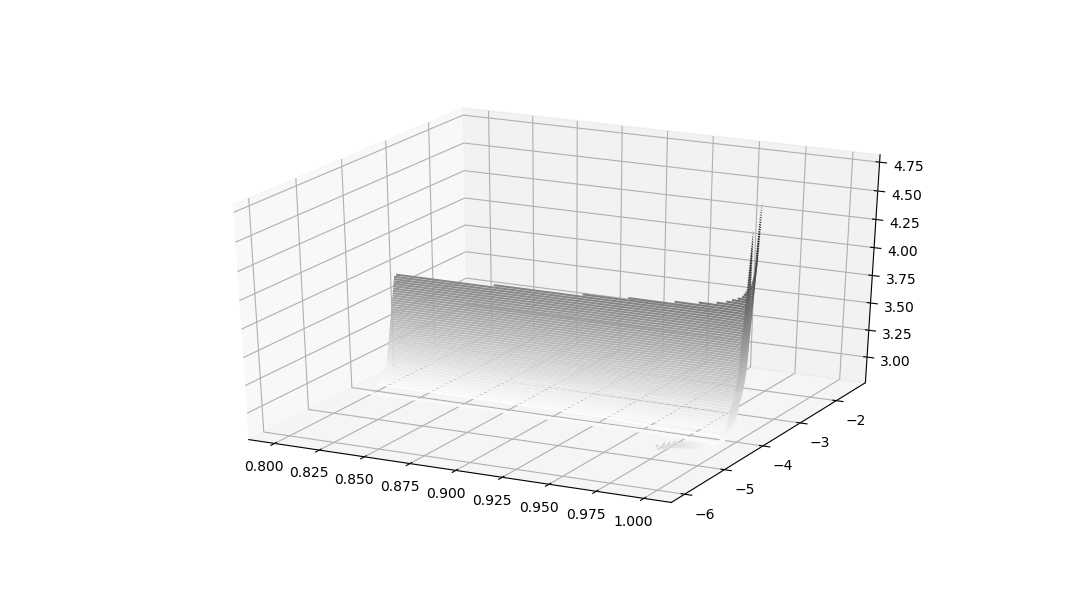

In [72]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 100, cmap='binary')